## Homework - Week 6 (Due Oct 11)
### 1. Eigendecomposition (in class)

- construct a 3x3 matrix with elements

 ```
       [40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60 ]
 ```
 
 using the ``np.linspace`` and ``reshape`` functions.
 
 - perform eigendecomposition on this matrix.

  - what is the rank of the original matrix?   Why is the answer not 3?


In [2]:
import numpy as np

aaa = np.linspace(40,60,9).reshape((3,3))
evals, evecs = np.linalg.eig(aaa)
rank = np.linalg.matrix_rank(aaa)

# the matrix has a rank of 2 because one of its eigenvalues is 0

### 2. Eigendecomposition 

- construct a 3x3 matrix with elements 

```
[16, 18.0625, 20.25,22.5625, 25, 27.5625, 30.25, 33.0625, 36]

```

using the ``np.linspace`` and ``reshape`` functions (hint: 4$^{2}$=16, 5$^{2}$=25, and 6$^{2}$=36).

 - confirm the formulas  $\textbf{A}$ = $\textbf{V}\Lambda\textbf{V}^{-1}$ and $\Lambda$= $\textbf{V}^{-1}\textbf{A}\textbf{V}$ using this matrix as $\textbf{A}$.



In [5]:
import numpy as np
a = (np.linspace(4,6,9)**2).reshape((3,3))
lam, v = np.linalg.eig(a)

lam = np.diag(lam)


vinv = np.linalg.inv(v)

arecon = np.dot(v,np.dot(lam,vinv))
lamrecon = np.dot(vinv, np.dot(a,v))

print(np.allclose(a,arecon))
print(np.allclose(lam,lamrecon))


True
True


### 3. PCA (in class)

- Take the data shown in our first plot of the PCA lecture notes:
```
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
```




Perform PCA on these data to produce the following plot:

![](./pca_sampledata.png)



Use the source code in ``pcademo3.py`` for plotting and guidance. 

**Hints**

- look at the notes and the source code for ``pcademo3.py``.  In particular, look at where the PCA steps start (denoted by "Step 1").   What variable do you need to drop in here and then mean-subtract?
-  There should be a block of code that produces the plot.   You can figure it out if you know what each variable stands for (i.e. if you can read the source code).  If not, putting in some commment lines to figure out where it is.
-  To make the appearance of the plot match what we want, you need to set the x and y limits properly.  The block of code that will do this is:

```
  # Set x ticks
  xl=ax[0].get_xlim()
  yl=ax[0].get_ylim()
  ax[1].set_xlim(xl)
  ax[1].set_ylim(yl)
  ax[2].set_xlim(-2.75,2.75)
  ax[2].set_ylim(-0.425,0.325)
  
```



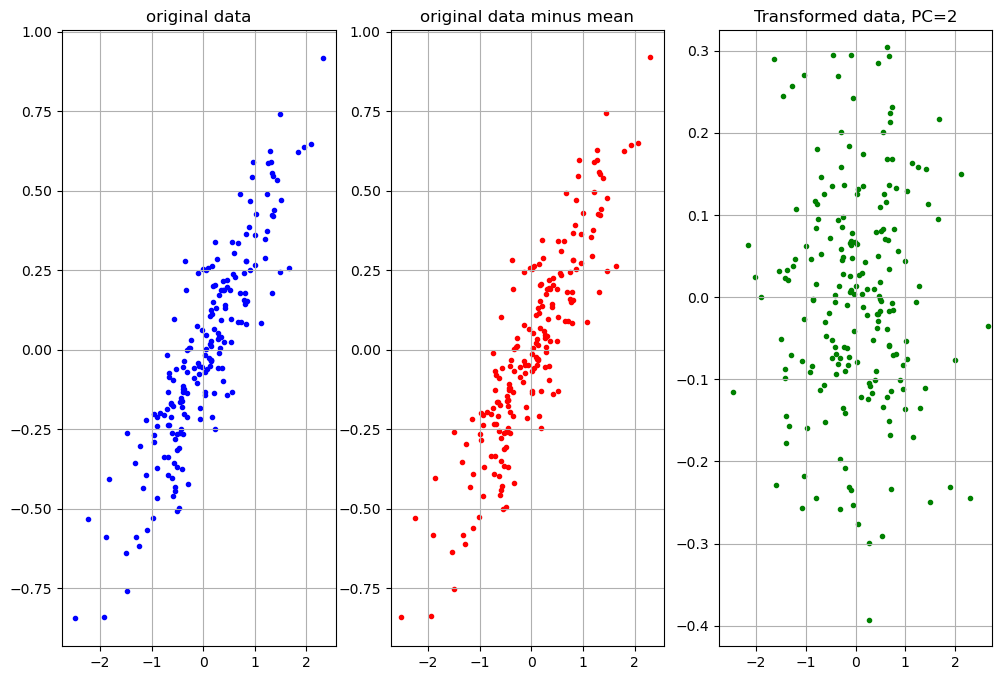

In [7]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

mean = np.mean(X,axis=0)

#1. subtract mean from data
mean_sub = X - mean

#2. compute covariance matrix
cov = np.matmul(mean_sub.T,mean_sub)

#3. eigendecomposition
eig_val, eig_vec = np.linalg.eigh(cov) 

#4. sort eigenvalues and eigenvectors large to small
indices = np.argsort(eig_val)[::-1]

eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

#5. get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val

#6. select number of PCs to compute
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
eig_val = eig_val[:n_comp]

#7. compute pca
pca_data = mean_sub.dot(eig_vec)




#8. plot
fig, ax = plt.subplots(1,3,figsize=(12,8))


ax[0].scatter(X[:,0],X[:,1], color='blue', marker='.')
ax[0].set_title("original data")
ax[0].grid('on')
ax[1].scatter(mean_sub[:,0],mean_sub[:,1], color='red', marker='.')
ax[1].set_title("original data minus mean")
ax[1].grid('on')
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='green', marker='.')
#wanted green instead of red
ax[2].set_title("Transformed data, PC="+str(n_comp) )
ax[2].grid('on')

xl=ax[0].get_xlim()
yl=ax[0].get_ylim()
ax[1].set_xlim(xl)
ax[1].set_ylim(yl)
ax[2].set_xlim(-2.75,2.75)
ax[2].set_ylim(-0.425,0.325)

xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()

### 4. PCA and SVD (in class) 

Part 1

- Create an array of random numbers with dimensions (7,3) ...

- perform PCA on this array (remember all of the steps to PCA).  

To produce a (3,3) covariance matrix, I recommend you do ``np.matmul(array.T,array)`` where "array" is your mean-subtracted array.  

- starting with the _mean\_subtracted_ version of the above array, perform SVD
-  Compare the eigenvectors computed from PCA to the matrices computed from SVD.  Are there any similarities?
-  Compare the eigenvalues computed from PCA to the singular values computed from SVD.   Are there any similarities or correlations?

Part 2
- Repeat part 1 except for a random (9,3) array.   


What conclusions can you draw about PCA and eigendecomposition vs SVD from these results?

In [ ]:
import numpy as np


r




### 5. A Simple PCA Calculation (in class) 

Start with the following array:

```
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])
```

Create a Python script (a file that will end with ".py") containing a single Python **function** (you know, the things that start with "def") that performs PCA (steps 1--5), including the number of principal components as a keyword variable.   

Demonstrate how to execute the function.   Run it where you retain i) 3 principal components and ii) 5 principal components.   Include a print statement within the function to print out the results.

(**Note**: don't overthink this question.  I'm just asking you to write code to do a simple PCA calculation.   It's really just making sure you remember how to do PCA -- which you should since we are just covering it -- _and_ write Python functions, which we covered during the first week of class.)


### 6. Root-Finding/Minimization (LM algorithm)

Consider the function $f(x) = x^{2}+-5*x+1.5*cos(x^{2}) + sin(x)$

* Find the roots of this function using the Levenberg-Marquardt algorithm
* Verify your answer by calculating $f(x)$ at the value of these roots



### 7. Root-Finding/Minimization (Newton-Raphson)

Consider the function $2x^{3}+3x^{2}-4x-5$

* Compute the value of this function at integers 1, 2,3, 4,and 5.
* Based on the above give a starting guess for the integer closest to the root of this function
* Use the definition of the Newton-Raphson method, to estimate the first update of the root of this function from:

      $x_{1}$ = $x_{o}$ - $f(x_{o})$/$f^{\prime}(x_{o})$
      
      (Note: it is easiest to define two functions -- func(x) and funcd(x) -- corresponding to the function and its derivative at some value x and call these functions in your manual N-R first estimate
      
      
* Compute the real root estimate from the Newton-Raphson method using again your starting integer value.  
* Verify that your solution is indeed a root of this function

* How close were you to the solution from just the first iteration?


### 8. Course Project 

By now, hopefully you have either refreshed your memory of basic Python code, NumPy operations, and numerical linear algebra or have learned a lot.  We will be covering some very basic fitting routines with SciPy next before moving on to plotting and displaying data with Matplotlib.

So now would be a good time to think about what you _might_ be interested in learning more about for your Class Project that is not covered explicitly in the syllabus/course schedule.

* What type of Project do you currently think you would like to focus on? 

I will try to give you some feedback and hopefully we can define a project that you will find interesting and helpful.


### 9. Feedback

We are now about 5 weeks into the course (about 1/3 of the way done!).  Structurally, what in your opinion is working with the course? What is not working?